1. [Вступление](#start)
2. [Импорт библиотек](#imports)
3. [Изучение данных](#check_data)
    * [Создание переменных](#create_variables)
    * [Смотрим на данные](#look_at_data)
    * [Подробная информация](#detail_info)
    * [Вывод](#conclusion)
4. [Предобработка](#processing)
    * [Приводим к нижнему регистру](#lower_columns)
    * [Заполнение пропусков](#fill_gaps)
    * [Приводим к верному типу](#correct_type)
    * [Общая выручка](#total_income)
    * [Вывод](#conclusion_2)
5. [Исследование данных](#research_data)
    * [Выпуск игр по годам](#amount_games_by_years)
    * [Просмотр платформ](#look_platforms)
        * [Все платформы](#all_platforms)
        * [Платформы с наилучшей выручкой](#top_10_platforms)
    * [Актуальный период](#actual_period)
    * [Прибыльные актуальные платформы](#the_best_platform)
    * [Диаграмма размаха](#boxplot)
    * [Взаимосвязь оценок критиков и пользователей на продажи](#correlation_platform)
    * [Взаимосвязь оценок критиков и пользователей на продажи, все платформы](#correlation_platforms)
    * [Влияния жанров игр на продажи](#genre_incomes)
    * [Вывод](#conclusion_3)
6. [Портрет пользователя](#user_portrait)
    * [Популярные платформы](#popular_platforms)
        * [Популярные платформы в Северной Америке](#popular_platforms_na)
        * [Популярные платформы в Европе](#popular_platforms_eu)
        * [Популярные платформы в Японии](#popular_platforms_jp)
    * [Популярные жанры](#popular_genres)
        * [Популярные платформы в Северной Америке](#popular_genres_na)
        * [Популярные платформы в Европе](#popular_genres_eu)
        * [Популярные платформы в Японии](#popular_genres_jp)
    * [Влияние рейтинга ESRB на продажи](#dependency_esrb_income)
        * [Влияние рейтинга ESRB на продажи в Северной Америке](#dependency_esrb_income_na)
        * [Влияние рейтинга ESRB на продажи в Европе](#dependency_esrb_income_eu)
        * [Влияние рейтинга ESRB на продажи в Японии](#dependency_esrb_income_jp)
    * [Вывод](#conclusion_4)
7. [Гипотезы](#hyptheses)
    * [Гипотеза первая](#hypothese_first)
    * [Гипотеза вторая](#hypothese_second)
    * [Вывод](#conclusion_5)
8. [Общий вывод](#total_conclusion)

# Проект по интернет-магазину "Стримчик"

## <a id="start">Вступление</a>

Интернет-магазин "Стримчик" является магазином, который продает игры разных жанров и для разных платформ, то есть в нем есть игры жанра "Шутер" для PS3 или, например, игры жанра "Стратегии" для PC. Наша цель - определить, какие критерии влияют на успешность игры и дать прогноз на следующий, 2017 год. Это позволит магазину выбрать успешный продукт и спланировать рекламную компанию

В нашем распоряжении данные до 2016 года, в которых мы имеем:
- данные о продажах игр
- оценки критиков и обычных пользователей
- жанры игр
- платформы, на которых игры выпускались 
- возрастной рейтинг

## <a id="imports">Импорт библиотек</a>

Для такого большего проекта понадобится немаленький объем библиотек. Так давайте начнем импортировать необходимые библиотеки:
- pandas для работы с таблицами и данными
- numpy осуществления сложных математических операций
- stats - работа со статистикой 
- math - обычные математические операции
- matplotlib - отображение графиков
- seaborn - отображение более красивых и сложных графиков
- plotly - еще более красивые графики
- warnings - игнорирование предупреждений
- display - красивое отображение таблиц 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings 
from IPython.display import display

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

## <a id="check_data">Изучение данных</a>

### <a id="create_variables">Создание переменных</a>
После импорта необходимых библиотек, мы можем приступить к работе. Первым делом нам нужно проверить, какие данные в нашем датасете, что есть, а чего нет, понять, что нужно добавить, а что не стоит. Но начать стоит с создания переменной для нашего датасета, с которой мы будем работать на протяжении всего проекта

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

### <a id="look_at_data">Смотрим на данные</a>
У нас есть таблица в переменной `games_data`. Теперь нам нужно просмотреть, какие данные там вообще имеются

In [3]:
games_data.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Первичный просмотр данных показал нам, что мы имеем 11 столбцов, в трех из которых есть пропуски (возможно столбцов с пропусками еще больше, в следующих шагах мы это выясним). Столбцы получились такими:
- name - название игры
- platform - на какой платформе была выпущена игра
- year_of_release - год выпуска
- genre - жанр игры
- na_sales - продажи в северной Америке
- eu_sales - продажи в Европе
- jp_sales - продажи в Японии
- other_sales - продажи в других странах
- critic_score - оценка критиков
- user_score - оценка пользователей
- rating - возрастной рейтинг

Хочется также отметить, что название столбцов начаты с прописных букв, что приводит к трудности поиска необходимых данных кодом. Поэтому предлагается привести названия столбцов к нижнему регистру. Далее посмотрим на более точную информацию по столбцам

### <a id="detail_info">Подробная информация по столбцам</a>
Сейчас необходимо узнать, какие столбцы содержат пропуски, какие типы данных содержат и что вообще из себя представляют. Сделать это мы сможем методом `info` и `describe`

In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Промежуточный вывод говорит сам за себя:
- name имеет два пропуска
- year_of_release с 269 пропусками
- Жанр два пропуска
- Оценки критиков с 8578 пропусками
- user_score имеет 6701 пропусков
- rating с 6766 пропусками

Также стоит отметить неверные типы данных в столбцах:
- year_of_release с типом float вместо int (так как нам дан просто год, без месяцев и дней)
- user_score с типом object вместо float

Давайте проверим числовую информацию по нашей таблице 

In [5]:
games_data.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Правильность числовых данных точна, нет никаких выбросов или неверных значений, правда интересно, почему такие низкие продажи у большинства игр: 80 тысяч копий - медиана по Америке или 0 в Японии. Надо будет решить вопрос 0 значений: либо заменить на медиану по жанру и стране, либо оставить в таком же виде

### <a id="conclusion">Вывод</a>
В разделе изучение данных мы поняли следующую информацию по нашей таблице:
- присутствуют пропуски
- есть неверные типы данных
- названия столбцов написаны с больших букв
- есть нулевые значения

В остальном все нормально, поэтому предлагается начать предобработку данных

## <a id="processing">Предобработка</a>
Предобработка данных - важный этап в анализе данных, ведь данные поступают к нам с пропусками, неверными типами данных, неверными значениями - с мусором. И если мы не обработаем их вначале, то получим следующую конструкцию - `garbage in - garbage out` если переводить, то - мусор внутри - мусор снаружи. Поэтому мы начинаем, этот важный этап

### <a id="lower_columns">Приводим к нижнему регистру</a>
В ходе первичного просмотра выяснилось, что столбцы прописаны с большими буквами в начале. Это неудобно при дальнейшем анализе, так как предстоит постоянно начинать название столбца с прописных букв. Давайте исправим эту ситуацию - метод `str.lower()` поможет нам в этом. `str` приведет название в строку, ведь метод `lower()` работает только со строками. Метод же `lower()` приводит все к нижнему регистру

In [6]:
games_data.columns = games_data.columns.str.lower()
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Отличное решение
</div>


### <a id="fill_gaps">Заполнение пропусков</a>
После того, как мы переименовали столбцы необходимо заполнить пустые значения и обработать значения 'tbd', о котором нам сообщил интернет-магазин в столбце `user_score`. Заполнять пропуски будет методом `fillna`, а значения 'tbd' срезом `loc`

Перед началом заполнения пропусков, хочется прояснить пару моментов:
- пропуски в `name` и `genre` мы заполним значением `unknown`, так как в них, почти со 100-ой вероятностью, программист забыл подставить необходимые данные, ну и потому, что мы не можем предположить, что должно стоять на месте пропусков
- `year_of_release` также содержит пропуски, которые программист, скорее всего, забыл просто подставить. Однако здесь мы можем попробовать взять медиану по выпуску игр на разные платформы и подставить значения, которые получим такой группировкой. Можно было бы еще, для большей точности, использовать Интернет для поиска необходимых игр, но это слишком муторно
- пропуски в `rating` также можно заполнить значением unknown - неизвестный. Такой выбор будет верным, ведь это категориальная переменная и никаких проблем в точности данных не возникнет
- САМЫЙ ГЛАВНЫЙ ПУНКТ! Пропуски в `critic_score` и `user_score` мы не можем никак заполнить, а пытаться подставить какие-либо значения приведет к большой проблеме в точности данных. Поэтому было решено не трогать их - оставить `NaN`
- хоть з`начение tbd` не входит в раздел пропусков, но все же, его также надо поменять - оно имеется в столбце `user_score` и означает 'будет определено в будущем'. Так как мы не можем менять значения в user_score (смотри выше почему), то мы заменим `'tbd'` на `NaN`

In [7]:
def fill_unknown(data, col):
    return data[col].fillna('unknown')

In [8]:
for col in ['name', 'genre', 'rating']:
    games_data[col] = fill_unknown(games_data, col)
    print(f'Количество пропусков в столбце {col} равно {games_data[col].isna().sum()}')

Количество пропусков в столбце name равно 0
Количество пропусков в столбце genre равно 0
Количество пропусков в столбце rating равно 0


Значения `unknown` подставили. Теперь переходим к `year_of_release`. Первым делом, определяем, с каким срезом данных мы будем работать - посмотрим первые значения. Далее определим, какие платформы присутствуют в полученном ранее срезе - эти платформы послужат нам для поиска медианы и подстановки значений в пропуски с такими платформами. 

Для решения поставленной задачи мы воспользуемся циклами, словарем, методом `median` и логическим срезом `loc`

In [9]:
gaps_year_release = games_data[games_data['year_of_release'].isna() == True]
gaps_year_release.head(10)

name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183     Sports      4.26      0.26      0.01         0.71          94.0   
377     Sports      0.59      2.36      0.04         0.51          84.0   
456     Action      1.80      0.97      0.00         0.29          74.0   
475   Fighting      1.57      1.02      0.00         0.41           NaN   
609    Shooter      2.36      0.14      0.00         0.03           NaN   
627       Misc      1.93      0.33      0.00         0.21          92.0   
657  Adventure      2.15      0.18      0.00         0.07          73.0   
678     Action      1.51      0.61      0.00         0.21          78.0   
719    Shooter      1.17      0.84      0.00         0.23          69.0   
805       Misc      1.33      0.56      0.00         0.20          80.0   

    user_score   rating  
183        8.5        E  
377        6.4        E  
456        7.9     E10+  
475        NaN  unknown  
609        NaN  unknown  
627        8.2        T  
657        tbd        E  
678        6.6     E10+  
719        6.7        T  
805        6.3        T

In [10]:
platforms_with_gapsp_year_release = gaps_year_release['platform'].unique()

In [11]:
dict_plarform_median_year_release = {}

for platform in platforms_with_gapsp_year_release:
    value = games_data[games_data['platform'] == platform]['year_of_release'].median()
    dict_plarform_median_year_release[platform] = value
dict_plarform_median_year_release

{'PS2': 2005.0,
 'Wii': 2009.0,
 '2600': 1982.0,
 'X360': 2010.0,
 'GBA': 2003.0,
 'PC': 2010.0,
 'PS3': 2011.0,
 'PS': 1998.0,
 'PSP': 2009.0,
 'XB': 2004.0,
 'GB': 1997.0,
 'DS': 2008.0,
 'GC': 2003.0,
 '3DS': 2013.0,
 'N64': 1999.0,
 'PSV': 2014.0}

Мы получили медианы годов выпуска игр по платформам. Теперь можем начать подстановку. Для этого воспользуемся логическим срезом и полученным словарем

In [12]:
for platform in platforms_with_gapsp_year_release:
    (games_data.loc[(games_data['year_of_release'].isna() == True) 
                    & (games_data['platform'] == platform), 
                    'year_of_release']) = dict_plarform_median_year_release[platform]
    
games_data['year_of_release'].isna().sum()

0

Релизы заполнены, переходим к значением `tbd`. Для решения воспользуемся обычным логическим срезом (можно было еще сделать методом `replace`, но был выбран логический срез). Для проверки выведем количество значений `tbd` перед и после обработки, а также количество пустых значений (`NaN`)

In [13]:
display(games_data[games_data['user_score'] == 'tbd']['user_score'].count())
display(games_data['user_score'].isna().sum())

2424

6701

In [14]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = None
    
display(games_data[games_data['user_score'] == 'tbd']['user_score'].count())
display(games_data['user_score'].isna().sum())

0

9125

### <a id="correct_type">Приводим к верному типу</a>
Названия столбцов привели к нижнему регистру и обработали пустые строки со значением `tbd`, отлично. Далее идет обработка типов столбцов, ведь у нас там есть некоторые неверные типы: `year_of_release` и `user_score`. Для решения этого вопроса воспользуемся методом `astype()` - приводит к любому нужному нам типу

Примечание: `year_of_release` переведем в int, так как у нас в значениях просто года, поэтому было решено не приводить к типу `datetime` - для удобства вычисления

In [15]:
games_data['year_of_release'] =  games_data['year_of_release'].astype('int64')
games_data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

In [16]:
games_data['user_score'] = games_data['user_score'].astype('float64')
games_data['user_score'].head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

### <a id="total_income">Общая выручка с продаж</a>
Теперь, когда все данные в хорошем состоянии, можно сделать последний этап предобработки данных - составить общую картину продаж игр по всему миру. Для этого посчитаем выручку со всех районов и просуммируем их. Для этого воспользуемся обычным методом `sum` по нескольким столбцам и сохраним результат в список, который присвоим новому столбцу нашей таблицы - `total_income`

In [17]:
games_data['total_income'] = sum([games_data['na_sales'], games_data['eu_sales'], 
                                  games_data['jp_sales'], games_data['other_sales']])

### <a id="conclusion_2">Вывод</a>
На этапе предобработка данных мы сделали много важных моментов:
- привели все названия столбцов к нижнему регистру
- привели к верному типу наши данные
- обработали пропуски в данных (не стали трогать critic_score, user_score, raiting)
- обработали значение tbd
- составили общую картину продаж игр по всему миру

Теперь можно приступить к исследованию наших данных

## <a id="research_data">Исследование данных</a>
Данные чистые и готовы к работе. Нам предстоит решить много вопросов: какие жанры самые популярные, какие приносят больше всего денег, на какую платформу лучше всего выпускать игру и много прочих вопросов. Давайте начинать

### <a id="amount_games_by_years">Выпуск игр по годам</a>
Изменилось ли количество выпускаемых игр с 1990 по 2016 года? Давайте узнаем! Для этого сгруппируем данные по году релиза игры и отобразим это на графике

In [18]:
grouped_data_by_years = games_data.groupby('year_of_release')['name'].count()
grouped_data_by_years

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 1.0, 'Выпуск игр за каждый год')

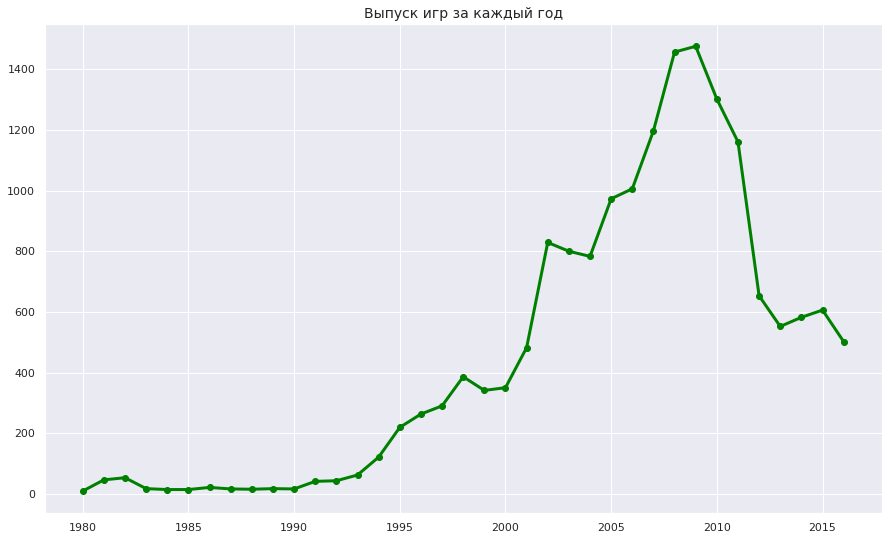

In [19]:
plt.figure(figsize=(15, 9))
plt.plot(grouped_data_by_years, marker='o', linewidth=3, color='green')
plt.title('Выпуск игр за каждый год', fontsize=14)

Надо же, а оказывается количество игр не увеличивалось каждый год, как это было в 90-х. Вплоть до 2009 года количество игр постоянно увеличивалось, но потом что-то изменилось и их количество начало падать из года в год. Возможно это хорошо, ведь слишком много мусора плохо, но я что-то не припомню, чтобы количество плохих игр уменьшалось, а количество шедевров увеличивалось. Эх, никто не вернет 2009

Игры до 92 года можно отбросить, ведь их количество не росло из года в год, а вот после 92-го начался подъем индустрии. Возьмем срез с 1992 по 2016

### <a id='look_platforms'>Просмотр платформ</a>
На данном этапе мы посмотрим на платформы, на их годовой доход, какие получали больше дохода, какие нет, какие были успешны, а какие потонули в пучине неизвестности

#### <a id='all_platforms'>Все платформы</a>
Первым делом нужно просмотреть все платформы по срезу, который мы определили на прошлом этапе. Далее необходимо составить погодовой доход от каждой платформы и составить по этим данным график

In [20]:
games_after_1992 = games_data.query('year_of_release >= 1992')
games_after_1992.shape

(16436, 12)

Вот, теперь у нас есть таблица с играми, вышедшими после 1992 года. Теперь нам нужно выявить выручку разных платформ по годам и посмотреть, какие платформы получали наибольшую выручку. Для этого сделаем pivot_table по платформам и годам и просуммируем годовую выручку

In [21]:
year_income_platforms = games_after_1992.pivot_table(index=['platform', 'year_of_release'], values='total_income', aggfunc='sum')
year_income_platforms = year_income_platforms.reset_index()
year_income_platforms.head(10)

platform  year_of_release  total_income
0      3DO             1994          0.02
1      3DO             1995          0.08
2      3DS             2011         63.20
3      3DS             2012         51.36
4      3DS             2013         57.76
5      3DS             2014         43.76
6      3DS             2015         27.78
7      3DS             2016         15.14
8       DC             1998          3.38
9       DC             1999          5.16

Отлично, у нас есть сводная таблица по платформам и выручке по годам. Теперь можно приступить к отображению графиков, но перед этим хотелось бы выявить и количество игр, которые выходили на определенных платформах в определенные года. Для этого тоже воспользуемся сводными таблицами. 

In [22]:
grouped_by_years_games_release = games_after_1992.pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc='count')
grouped_by_years_games_release = grouped_by_years_games_release.reset_index()
grouped_by_years_games_release.head(10)

platform  year_of_release  name
0      3DO             1994     1
1      3DO             1995     2
2      3DS             2011   116
3      3DS             2012    93
4      3DS             2013    99
5      3DS             2014    80
6      3DS             2015    86
7      3DS             2016    46
8       DC             1998     7
9       DC             1999    14

In [23]:
year_income_platforms['games_count'] = grouped_by_years_games_release['name']
year_income_platforms.head(10)

platform  year_of_release  total_income  games_count
0      3DO             1994          0.02            1
1      3DO             1995          0.08            2
2      3DS             2011         63.20          116
3      3DS             2012         51.36           93
4      3DS             2013         57.76           99
5      3DS             2014         43.76           80
6      3DS             2015         27.78           86
7      3DS             2016         15.14           46
8       DC             1998          3.38            7
9       DC             1999          5.16           14

На данный момент, таблица готова. Приступаем к графикам. Построим график ценообразования различных платформ по годам и отобразим их в виде кругов, для лучшего восприятия. Поможет в этом библиотека `plotly`

In [24]:
fig = px.scatter(
    data_frame=year_income_platforms, 
    x='year_of_release', 
    y='total_income', 
    hover_name='platform',
    color='platform',
    size='total_income',
    size_max=40,
    title='Годовой доход платформ'
)
fig.show()

In [25]:
px.line(year_income_platforms, x ='year_of_release', y ='total_income', 
        color = 'platform', line_shape='spline', title='Годовой доход платформ')

С помощью таких графиков можно сделать некоторые выводы:
- компания Sony со своими PS1-3 показывала доминирующую силу, пока не вышел XBox360 и Wii
- 5-6 лет - возраст того, когда платформы изживают себя и начинают падать их доходы, в следствии чего выходят новые, более совершенные платформы
- разнообразие платформ уменьшалось с каждым 10-ем, в конце графика мы видим 5 платформ, которые могут дальше конкурировать за рынок, в то время как другие платформы по доходам пдаают с огромной скоростью

Давайте выделим платформы, которые по доходам показали себя лучше всего. Чтобы найти ответ на данный вопрос, нужно сгруппировать платформы и просуммировать их доходы, без годовой привязки

#### <a id='top_10_platforms'>Самые прибыльные платформы</a>
Так, мы просмотрели все платформы. Теперь нам нужно выделить самые прибыльные платформы и просмотреть график по ним. Для этого воспользуемся такими же действиями, которые выполняли на прошедшем подэтапе

In [26]:
grouped_by_platform_income = year_income_platforms.groupby('platform')['total_income'].sum()
grouped_by_platform_income = grouped_by_platform_income.reset_index()
grouped_by_platform_income_top_10 = grouped_by_platform_income.sort_values(by='total_income', ascending=False).head(10)
grouped_by_platform_income_top_10

platform  total_income
15      PS2       1255.77
27     X360        971.42
16      PS3        939.65
25      Wii        907.51
3        DS        806.10
14       PS        730.86
5       GBA        317.85
17      PS4        314.14
18      PSP        294.05
12       PC        259.45

Вот мы и получили топ-10 платформ по общим доходам. Давайте теперь выделим из нашей общей таблицы те данные, которые равны тем платформам, которые мы выделили выше. Воспользуемся срезом и сводными таблицами

In [27]:
games_data_top_10_platforms = games_after_1992.query('platform in @grouped_by_platform_income_top_10.platform')
games_data_top_10_platforms_pivot = games_data_top_10_platforms.pivot_table(index=['platform', 'year_of_release'],
                                                                           values='total_income', aggfunc='sum')
games_data_top_10_platforms_pivot = games_data_top_10_platforms_pivot.reset_index()
games_data_top_10_platforms_pivot.head(10)

platform  year_of_release  total_income
0       DS             2004         17.27
1       DS             2005        130.14
2       DS             2006        119.81
3       DS             2007        146.94
4       DS             2008        148.65
5       DS             2009        119.54
6       DS             2010         85.02
7       DS             2011         26.18
8       DS             2012         11.01
9       DS             2013          1.54

Таблица готова, можно рисовать графики. Рисовать их будем с помощью уже известной библиотеки `plotly`

In [28]:
fig = px.scatter(
    data_frame=games_data_top_10_platforms_pivot, 
    x='year_of_release', 
    y='total_income', 
    hover_name='platform',
    color='platform',
    size='total_income',
    size_max=40,
    title='Годовой доход платформ'
)
fig.show()

In [29]:
px.line(games_data_top_10_platforms_pivot, x ='year_of_release', y ='total_income', 
        color = 'platform', line_shape='spline', title='Годовой доход платформ')

На графике можно отметить некоторые моменты:
- PS3, XBox360 и Wii с 2013 года испытали сильный обвал и почти что пришли к краху
- PS4 тоже просел, но не так сильно, как остальные - это приоритетная платформа
- PC как шел тихим ходом, так и остался верен своему принципу)

### <a id='actual_period'>Актуальный период</a>
После того, как мы узнали, какие платформы оказались успешными с 1992-2016, мы получили ценную информацию, но это может быть не актуальным. Ведь наша основная цель - какая платформа с каким жанром сможет принести разработчикам успех и славу в 2017 году. Поэтому нам нужно определить актуальный период. В этом нам помогут данные на прошлых этапах и подэтапах. Погнали!

Давайте посмотрим на график всех платформ с их годовым доходом и графиком выхода игр по годам на всех платформах

In [30]:
px.line(year_income_platforms, x ='year_of_release', y ='total_income', 
        color = 'platform', line_shape='spline', title='Годовой доход платформ')

Text(0.5, 1.0, 'Выпуск игр за каждый год')

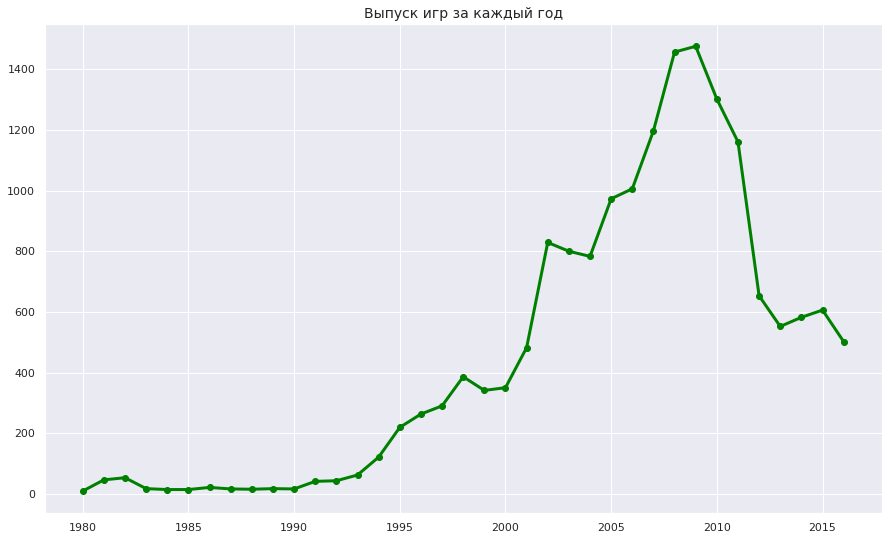

In [31]:
plt.figure(figsize=(15, 9))
plt.plot(grouped_data_by_years, marker='o', linewidth=3, color='green')
plt.title('Выпуск игр за каждый год', fontsize=14)

У нас есть два года, по которым мы можем сделать срез:
- 2009 - так как в этот год произошел, непрекращающийся до этого момента, спад количества игр, который продолжил падать каждый год
- 2013 - так как в этот год произошел маленький подъем на два года в количестве игр

Если посмотреть на первый график и на две даты: 2009 и 2013 года, то мы поймем, что 2013 год покажется более актуальным, ведь в его пользу играет сразу несколько факторов:
- в 2013 году выпускаются две новейшие платформы: PS4 и XBoxOne
- в 2013 году выпуск новых игр впервые, после 2009 года, вышел из убывающей прямой в возрастающую

Поэтому логичнее всего предположить, что лучше взять срез с 2013 года - это более актуальная дата с актуальными платформами и играми. Только нужно из данной выборки убрать платформу DS, так как это последний год работы данной платформы

In [32]:
actual_game_data = games_data.query('year_of_release >= 2013 and platform != "DS"')
display(actual_game_data.head(10))
display(actual_game_data['platform'].unique())

name platform  year_of_release  \
16                         Grand Theft Auto V      PS3             2013   
23                         Grand Theft Auto V     X360             2013   
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
60                       Call of Duty: Ghosts     X360             2013   
69                       Call of Duty: Ghosts      PS3             2013   
72                                  Minecraft     X360             2013   
77                                    FIFA 16      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16        Action      7.02      9.09      0.98         3.96          97.0   
23        Action      9.66      5.14      0.06         1.41          97.0   
31       Shooter      6.03      5.86      0.36         2.38           NaN   
33  Role-Playing      5.28      4.19      4.35         0.78           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
60       Shooter      6.73      2.56      0.04         0.91          73.0   
69       Shooter      4.10      3.63      0.38         1.25          71.0   
72          Misc      5.70      2.65      0.02         0.81           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   

    user_score   rating  total_income  
16         8.2        M         21.05  
23         8.1        M         16.27  
31         NaN  unknown         14.63  
33         NaN  unknown         14.60  
42         8.3        M         12.62  
47         NaN  unknown         11.68  
60         2.6        M         10.24  
69         2.6        M          9.36  
72         NaN  unknown          9.18  
77         4.3        E          8.58

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'PSP'], dtype=object)

### <a id='the_best_platform'>Прибыльные актуальные платформы</a>
На данном этапе мы с вами определим, какие платформы являются намного прибыльными среди тех, кто остался в актуальных. Именно с этими платформами мы будем работать в дальнейшем. Давайте определим, какие платформы потенциально прибыльные и успешные

In [33]:
actual_game_data_grouped_by_platform_year = actual_game_data.pivot_table(index=['platform', 'year_of_release'],
                                                                        values='total_income', aggfunc='sum')
actual_game_data_grouped_by_platform_year = actual_game_data_grouped_by_platform_year.reset_index()
actual_game_data_grouped_by_platform_year.head(10)

platform  year_of_release  total_income
0      3DS             2013         57.76
1      3DS             2014         43.76
2      3DS             2015         27.78
3      3DS             2016         15.14
4       PC             2013         12.38
5       PC             2014         13.28
6       PC             2015          8.52
7       PC             2016          5.25
8      PS3             2013        113.25
9      PS3             2014         47.76

Из той таблицы, что нам была дана, мы сделали сводную таблицу, в которой мы также, как и в предыдущих этапах, осуществили объединение по дате и платформам. Теперь у нас есть таблица, содержащая годовые доходы платформ, можно приступить к постройке графиков. Сделаем линейный график и кругую диаграмму. На линейном графике (`px.line`) мы сможем посмотреть на рост или падение продаж, а круговая диаграмма (`plt.pie`) даст нам сравнительную характеристику по доходам.

In [34]:
px.line(actual_game_data_grouped_by_platform_year, x ='year_of_release', y ='total_income', 
        color = 'platform', line_shape='spline', title='Годовой доход актуальных платформ')

Давайте проанализируем данный график. Мы видим, что платформы, которые были выпущены в 2013 году (PS4 и XBoxOne) первые полтора года росли, но потом, как и все другие платформы, начали падать по доходу. Вообще, все платформы, кроме PS4, XBoxOne и PC падали еще с 2009, что говорит об их скверном экономическом положении. Поэтому на данном графике можно выделить три платформы, которые являются потенциально успешными, за счет своей устойчивости к такому рынку и технологиям (PS4 и XBoxOne - новейшие платформы, PC - постоянно растущая платформа, которая меняется каждый год)

Давайте теперь посмотрим на уровень доходов данных платформ (обратите внимание на старые платформы и на те, что мы выделили на этом шаге)

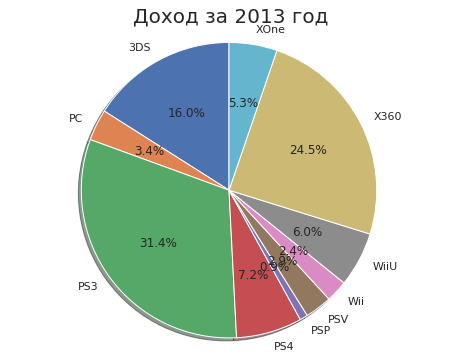

None

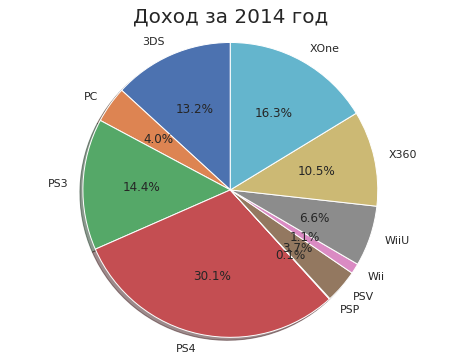

None

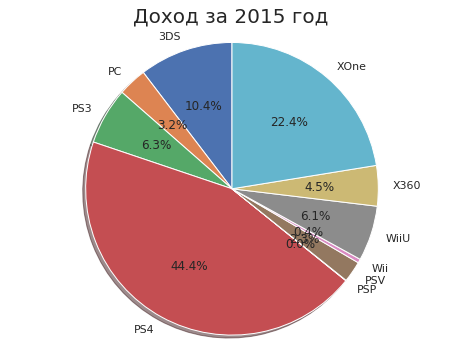

None

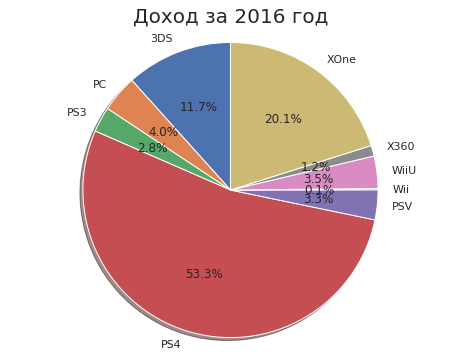

None

In [35]:
years = range(2013, 2017)
for year in years:
    df = actual_game_data_grouped_by_platform_year.query('year_of_release == @year')
    
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.pie(df['total_income'], labels=df['platform'],
            autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.title(f'Доход за {year} год', fontsize=20)

    display(plt.show())

По круговому графику видно, как новые платформы (PS4 и XBoxOne) вытеснили с рынка свои предыдущие версии (PS3 и XBox360). Они также и являются самыми доходными платформами на рынке, поэтому их и стоит выбрать как самые актуальные и потенциально прибыльные платформы. 

Что касается PC, его доходность составляет всего 3-4%, в то время как есть более экономически сильная платформа - 3DS. Почему бы не выбрать именно эту платформу в тройку потенциально интересных нам платформ? Не стоит смотреть на процентное соотношение, как на фактор экономического потенциала (это не касается PS4 и XBoxOne, так как мы видим и на этой диаграмме, и на линейном графике, что данные платформы по доходу так и так выше), ведь доля остальных, маленьких платформ уменьшилась, соответственно проценты этих платформ перешли 3DS, хоть по доходу она и падает из года в год (линейный график), но все же ее доход выше наших маленьких устройств, именно поэтому проценты рынка перешли этой платформе. А теперь посмотрим на PC - эта платформа не теряла свои позиции на рынке и постоянно сохраняла свой годовой доход на одном уровне, что уже говорит об экономической устойчивости платформы. Поэтому вопрос исчеран, PC входит в нашу тройку лидеров

Тройка лидеров получилась такой: PS4, XBoxOne и PC. Но давайте также проверим диаграмму размаха, может там ситуация покажется другой

### <a id='boxplot'>Диаграмма размаха</a>
Мы выделили тройку актуальных и потенциально выгодных платформ. Давайте теперь проверим диапазон распределения годового дохода различных платформ. Для этого воспользуемся библиотекой `seaborn` и методом `boxplot`

In [36]:
def show_box_plot(df, year):    
    
    
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_xscale("log")

    sns.boxplot(x='total_income', y='platform', data=df, width=.6).set_title(f'Средние доходы за {year}')

    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    
    return ax

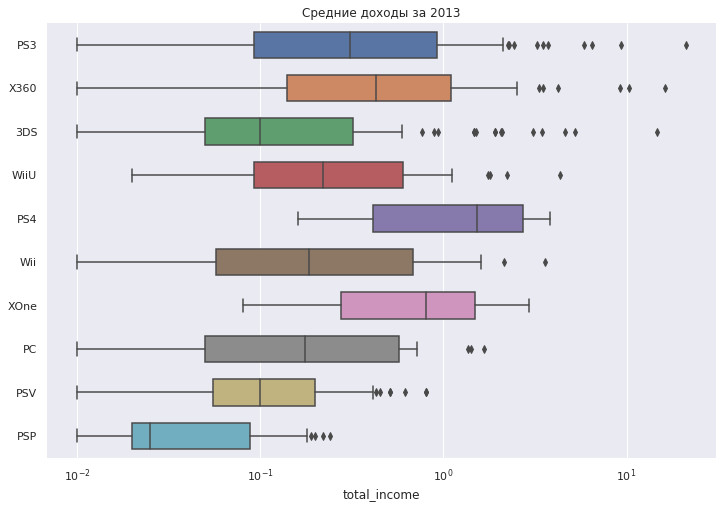

In [37]:
show_box_plot(actual_game_data, 2013)

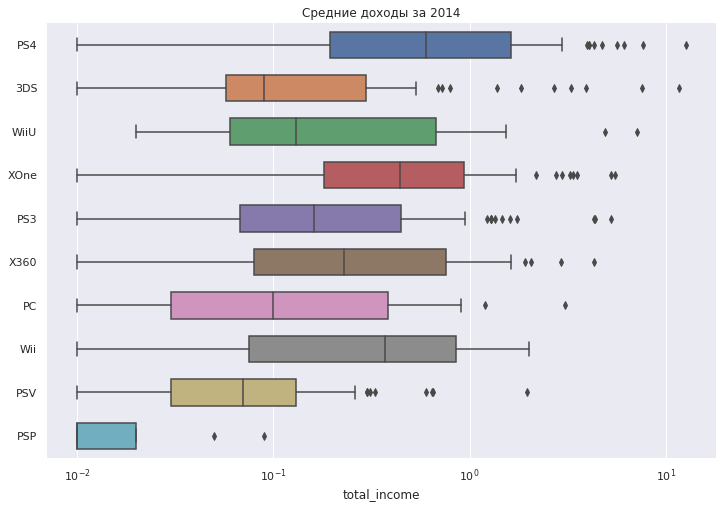

In [38]:
show_box_plot(actual_game_data, 2014)

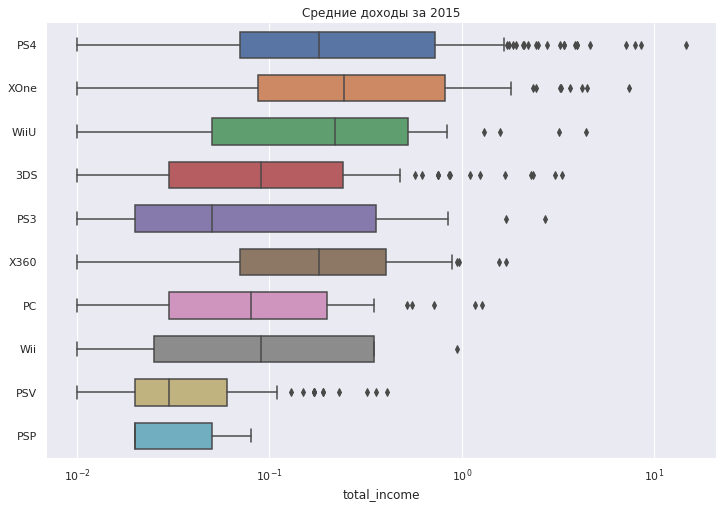

In [39]:
show_box_plot(actual_game_data, 2015)

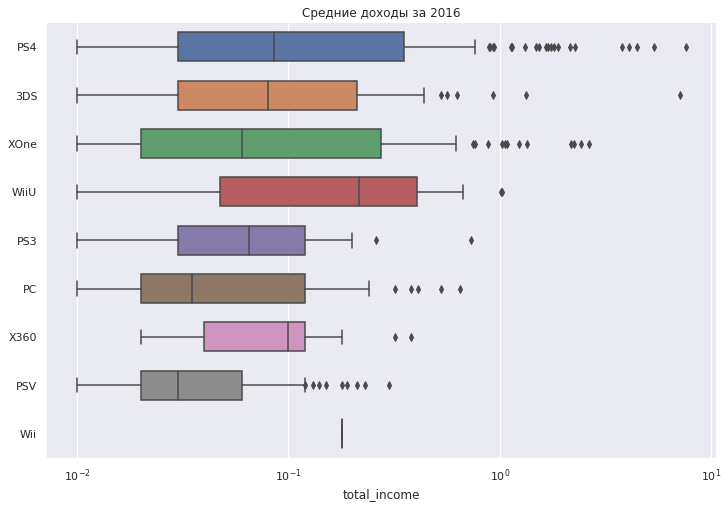

In [40]:
show_box_plot(actual_game_data, 2016)

Диаграмма размаха показала нам, что у PS4 и XBoxOne есть много выбросов, то есть шедевры, которые собирали млн-ые продажи. У этих же платформ в первый год появления на рынке средние сборы за игры были крайне высокими, это связано с новшеством платформ, которое потом спало, играми, которые выходили в начале (первым делом выпускались успешные и прибыльные игры), которые приносили огромные доходы. Потом ажиотаж спал, игры начали выходить разных уровней и средний уровень дохода спал. 

У PC ситуация похожая, в 2013 году годовая выручка была намного выше, чем в 2016. Наверняка это связано с большим количеством игр и играм, покоривших сердца пользователей. 

Стоит отметить, платформу WiiU, которая всегда держалась позади таких гигантов, как PS и XBox, однако в 2016 средний уровень годового дохода у этой платформы остался таким же, каким был в 2013, что и привело к тому, что в 2016 средний доход платформы оказался выше чем у гигантских платформ

### <a id='correlation_platform'>Взаимосвязь оценок критиков и пользователями на продажи</a>
Теперь давайте определим, влияют ли оценки пользователей и критиков на продажи игры. Для этого мы построим диаграмму рассеяния, корреляцию Пирсона и посмотрим на их результаты. Никто не знает, что окажется правдой, однако, как геймер, я могу предположить, что оценки пользователей должны влиять на продажи игры, ведь пользователи доверяют другим пользователям, чем каким-то критикам, которые могут иметь абсолютно другие вкусы

Итак, первым делом давайте построим диаграмму рассеяния. Для этого воспользуемся библиотекой `sns` и методом `pairplot`, но перед постройкой самой диаграммы, мы должны сделать срез по какой-то одной платформе, например по 'PS4'

Text(0.5, 1.04, 'Взаимосвязь оценок критиков и пользователей на продажи')

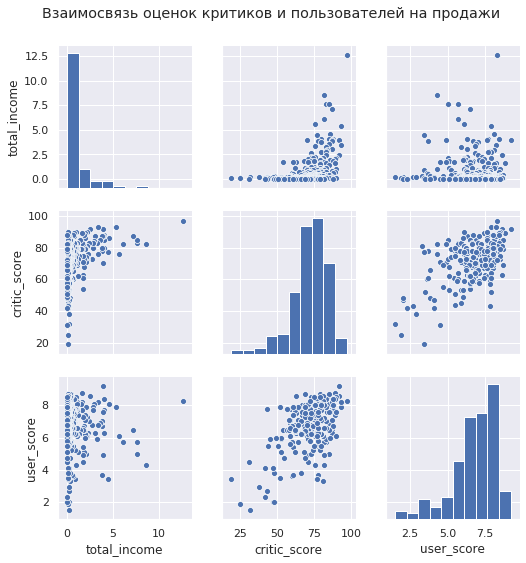

In [41]:
total_income_ps_4_scores = pd.DataFrame(data=actual_game_data.query('platform == "PS4"')[['total_income', 'critic_score', 'user_score']])

total_income_ps_4_scores = total_income_ps_4_scores.dropna()

diagram = sns.pairplot(total_income_ps_4_scores)
diagram.fig.suptitle('Взаимосвязь оценок критиков и пользователей на продажи', y=1.04)

Результат меня слегка удивил - отзывы критиков влияют на продажи гораздо сильнее, чем отзывы обычных пользователей. Это видно по верхнему ряду диаграммы рассеяния - чем выше рейтинг критиков, тем выше доходность платформы. У оценки пользователей все немного сложнее, там и со средней оценкой и с высокой у платформы хорошие шансы получить высокий доход. Давайте теперь проверим корреляцию Пирсона:

In [42]:
total_income_ps_4_scores[['total_income', 'critic_score', 'user_score']].corr()

total_income  critic_score  user_score
total_income      1.000000      0.405895   -0.033625
critic_score      0.405895      1.000000    0.557654
user_score       -0.033625      0.557654    1.000000

Результат показал немного другую картину - отзывы критиков не так сильно взаимосвязаны с продажами как мы думали. А с рейтингом пользователей ситуация такая, что связи между ним и продажами вообще нет. Можем тут есть другие параметры, которые влияют на корреляцию (зависимость третьего параметра)

In [43]:
actual_game_data.query('platform == "PS4"').corr()

year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.248961 -0.208306 -0.060993    -0.234796   
na_sales               -0.248961  1.000000  0.785362  0.472981     0.944259   
eu_sales               -0.208306  0.785362  1.000000  0.464563     0.944698   
jp_sales               -0.060993  0.472981  0.464563  1.000000     0.496467   
other_sales            -0.234796  0.944259  0.944698  0.496467     1.000000   
critic_score           -0.021142  0.415008  0.346720  0.322358     0.409191   
user_score              0.152447 -0.020933 -0.048925  0.171332    -0.035639   
total_income           -0.235032  0.928160  0.958157  0.527129     0.998051   

                 critic_score  user_score  total_income  
year_of_release     -0.021142    0.152447     -0.235032  
na_sales             0.415008   -0.020933      0.928160  
eu_sales             0.346720   -0.048925      0.958157  
jp_sales             0.322358    0.171332      0.527129  
other_sales          0.409191   -0.035639      0.998051  
critic_score         1.000000    0.557654      0.406568  
user_score           0.557654    1.000000     -0.031957  
total_income         0.406568   -0.031957      1.000000

И тоже неверно - никаких скрытых параметров, влияющих на корреляцию продаж с оценками нет. А значит можно сделать локальный вывод - чем выше оценка критиков, тем выше сборы у игры, но это работает не всегда

### <a id='correlation_platforms'>Взаимосвязь оценок критиков и пользователями на продажи, все платформы</a>
После того, как мы проверили корреляцию у одной платформы, мы получили интересные выводы. Теперь нужно проверить, все ли платформы имеют такую корреляцию или это касается лишь 'PS4'

In [44]:
def draw_diagram_corr(data, platform):
    data_platform = data.query('platform == @platform')[['total_income', 'critic_score', 'user_score']]
    diagram = sns.pairplot(data_platform, dropna=True)
    diagram.fig.suptitle(f'Диаграмма рассеяния для платформы {platform}', y=1.04)
    return diagram

In [45]:
platforms = actual_game_data['platform'].unique()
print(f'Всего у нас {len(platforms)} платформ')

Всего у нас 10 платформ


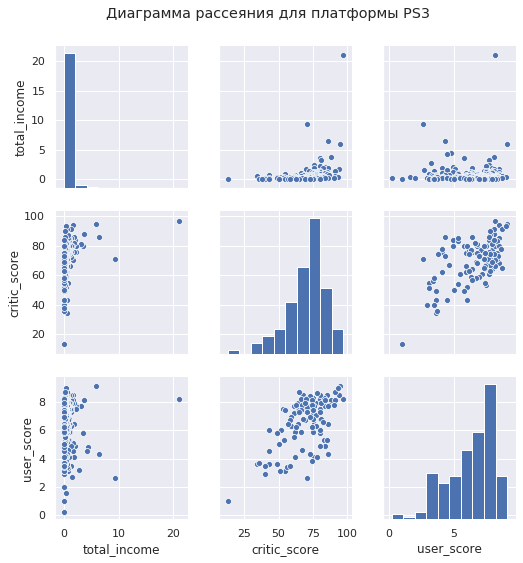

In [46]:
draw_diagram_corr(actual_game_data, platforms[0])

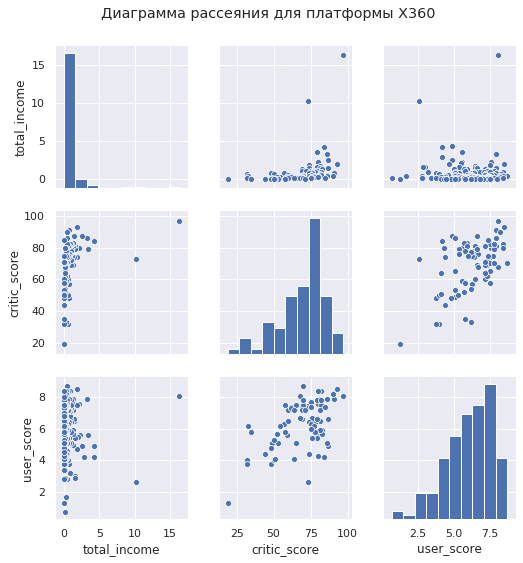

In [47]:
draw_diagram_corr(actual_game_data, platforms[1])

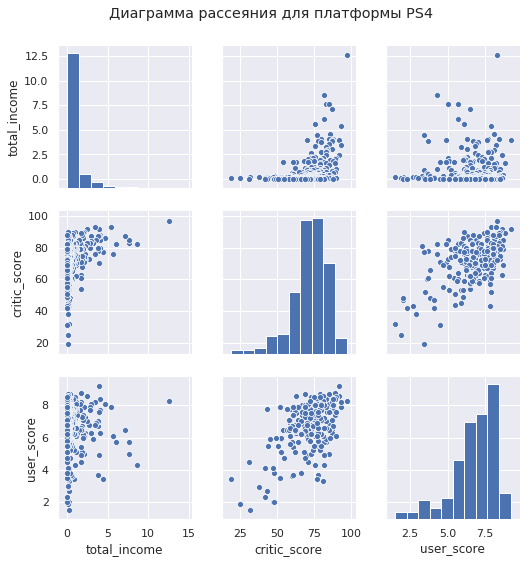

In [48]:
draw_diagram_corr(actual_game_data, platforms[2])

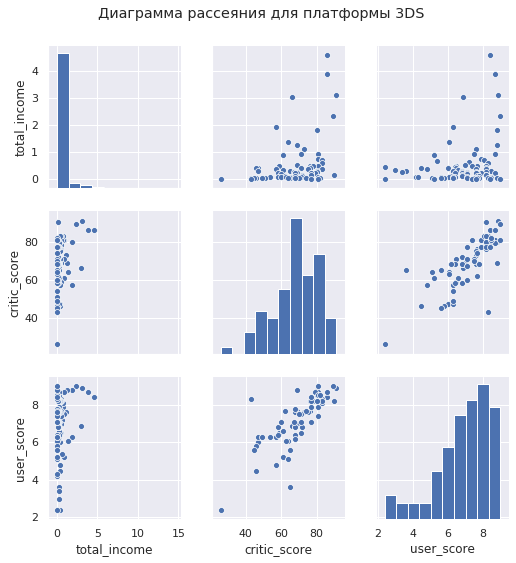

In [49]:
draw_diagram_corr(actual_game_data, platforms[3])

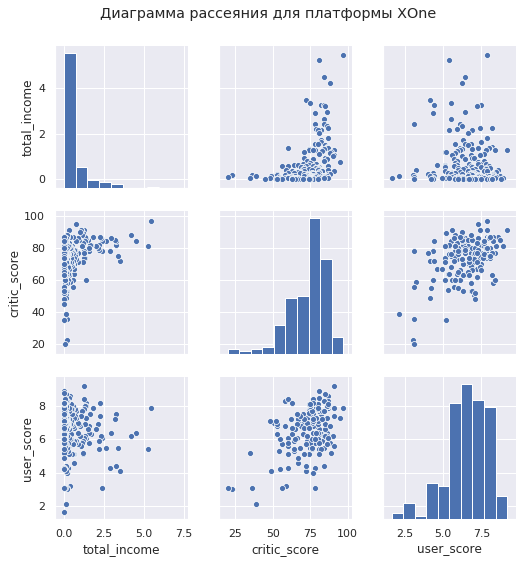

In [50]:
draw_diagram_corr(actual_game_data, platforms[4])

In [51]:
for platform in platforms:
    print(f'Корреляция Пирсона платформы {platform}')
    display(actual_game_data.query('platform == @platform')[['total_income', 'critic_score', 'user_score']].corr())

Корреляция Пирсона платформы PS3


total_income  critic_score  user_score
total_income      1.000000      0.334285    0.002394
critic_score      0.334285      1.000000    0.599920
user_score        0.002394      0.599920    1.000000

Корреляция Пирсона платформы X360


total_income  critic_score  user_score
total_income      1.000000      0.350345   -0.011742
critic_score      0.350345      1.000000    0.520946
user_score       -0.011742      0.520946    1.000000

Корреляция Пирсона платформы PS4


total_income  critic_score  user_score
total_income      1.000000      0.406568   -0.031957
critic_score      0.406568      1.000000    0.557654
user_score       -0.031957      0.557654    1.000000

Корреляция Пирсона платформы 3DS


total_income  critic_score  user_score
total_income      1.000000      0.361008    0.250366
critic_score      0.361008      1.000000    0.767946
user_score        0.250366      0.767946    1.000000

Корреляция Пирсона платформы XOne


total_income  critic_score  user_score
total_income      1.000000      0.416998   -0.068925
critic_score      0.416998      1.000000    0.472462
user_score       -0.068925      0.472462    1.000000

Корреляция Пирсона платформы WiiU


total_income  critic_score  user_score
total_income      1.000000      0.376415    0.419330
critic_score      0.376415      1.000000    0.721313
user_score        0.419330      0.721313    1.000000

Корреляция Пирсона платформы Wii


total_income  critic_score  user_score
total_income      1.000000           NaN    0.682942
critic_score           NaN           NaN         NaN
user_score        0.682942           NaN    1.000000

Корреляция Пирсона платформы PC


total_income  critic_score  user_score
total_income      1.000000      0.196030   -0.093842
critic_score      0.196030      1.000000    0.429562
user_score       -0.093842      0.429562    1.000000

Корреляция Пирсона платформы PSV


total_income  critic_score  user_score
total_income      1.000000      0.257695    0.001221
critic_score      0.257695      1.000000    0.607096
user_score        0.001221      0.607096    1.000000

Корреляция Пирсона платформы PSP


total_income  critic_score  user_score
total_income           1.0           NaN        -1.0
critic_score           NaN           NaN         NaN
user_score            -1.0           NaN         1.0

Итак, посмотрем на все платформы по корреляции Пирсона и на часть платформ диаграммой рассеяния, можно сделать вывод - отзывы пользователей влияют на продажи только на некоторых платформах, скорее всего это связано с верой пользователей в комьюнити платформы (Wii, WiiU) и то, что отзывы критиков могут не так сильно влиять на продажи игр на некоторых платформах, на них, наверняка, пользователи доверяют лишь своему опыту и чутью (PC)

### <a id='genre_incomes'>Влияния жанров игр на продажи</a>
Ну и последним шагом в нашем этапе будет оценка влияния жанра на продажи игры. Влияет ли жанр на продажу игры, какие жанры популярны на разных платформах, а какие нет. Для того, чтобы ответить на этот вопрос, мы сгруппируем нашу таблицу по платформам и возьмем среднее и медиану по годовому доходу платформ по разные года

In [52]:
def grouped_by_genre_by_year(data, year):
    grouped_data = (data.query('year_of_release == @year')
                    .pivot_table(index='genre', values='total_income', aggfunc=['mean', 'median']))
    grouped_data = grouped_data.reset_index()
    grouped_data.columns = ['genre', 'mean_total_income', 'median_total_income']
    return grouped_data

def top_5_genre_by_year(data):
    return data.sort_values(by='mean_total_income', ascending=False).head(5)

Так как у нас 4 года, значит мы будем смотреть пять самых популярных жанров года 4 раза, поэтому легче будет сделать функции по созданию сгруппированной таблицы за год и по выбору топ пяти самых популярных жанра года. Давайте теперь посмотрим, как менялись жанры из года в год

In [53]:
grouped_by_genres_2013 = grouped_by_genre_by_year(actual_game_data, 2013)

In [54]:
top_5_genres_2013 = top_5_genre_by_year(grouped_by_genres_2013)
top_5_genres_2013

genre  mean_total_income  median_total_income
8    Shooter           1.035167                0.335
0     Action           0.838425                0.210
10    Sports           0.776604                0.370
6     Racing           0.732941                0.300
4   Platform           0.701471                0.385

In [55]:
grouped_by_genres_2014 = grouped_by_genre_by_year(actual_game_data, 2014)

In [56]:
top_5_genres_2014 = top_5_genre_by_year(grouped_by_genres_2014)
top_5_genres_2014

genre  mean_total_income  median_total_income
8    Shooter           1.387447                 0.66
4   Platform           0.881000                 0.83
10    Sports           0.836111                 0.46
2   Fighting           0.689130                 0.13
6     Racing           0.617037                 0.17

In [57]:
grouped_by_genres_2015 = grouped_by_genre_by_year(actual_game_data, 2015)

In [58]:
top_5_genres_2015 = top_5_genre_by_year(grouped_by_genres_2015)
top_5_genres_2015

genre  mean_total_income  median_total_income
8        Shooter           1.985588                0.925
10        Sports           0.692203                0.120
7   Role-Playing           0.482564                0.105
4       Platform           0.465385                0.100
6         Racing           0.448333                0.150

In [59]:
grouped_by_genres_2016 = grouped_by_genre_by_year(actual_game_data, 2016)

In [60]:
top_5_genres_2016 = top_5_genre_by_year(grouped_by_genres_2016)
top_5_genres_2016

genre  mean_total_income  median_total_income
8        Shooter           0.813191                0.240
10        Sports           0.489375                0.120
7   Role-Playing           0.336667                0.120
2       Fighting           0.279375                0.085
4       Platform           0.215333                0.100

In [61]:
df = pd.concat([top_5_genres_2013, top_5_genres_2014, top_5_genres_2015, top_5_genres_2016])
df['genre'].value_counts()

Platform        4
Shooter         4
Sports          4
Racing          3
Role-Playing    2
Fighting        2
Action          1
Name: genre, dtype: int64

И вот теперь мы можем сказать с уверенностью, что `shooter`, `platform` и `sports` самые популярные жанры, они покупаются каждый год, поэтому можно будет сосредоточиться именно на этих жанрах, но стоит приглядеться к одной особенности, `shooter` каждый год держится на пике популярности - первое место не даст солгать, а вот `platform` и `sports` прыгают со своих мест, поэтому можно сделать еще один вывод - чтобы быть полностью уверенным в доходе игры, нужно выпускать `shooter`!

In [62]:
def bottom_5_genre_by_year(data):
    return data.sort_values(by='mean_total_income', ascending=False).tail(5)

In [63]:
bottom_5_genres_2013 = bottom_5_genre_by_year(grouped_by_genres_2013)
bottom_5_genres_2013

genre  mean_total_income  median_total_income
9   Simulation           0.468947                0.120
2     Fighting           0.354500                0.155
11    Strategy           0.322105                0.190
5       Puzzle           0.320000                0.100
1    Adventure           0.102500                0.025

In [64]:
bottom_5_genres_2014 = bottom_5_genre_by_year(grouped_by_genres_2014)
bottom_5_genres_2014

genre  mean_total_income  median_total_income
7   Role-Playing           0.509778                 0.11
9     Simulation           0.507273                 0.12
5         Puzzle           0.212857                 0.05
11      Strategy           0.122500                 0.06
1      Adventure           0.074267                 0.04

In [65]:
bottom_5_genres_2015 = bottom_5_genre_by_year(grouped_by_genres_2015)
bottom_5_genres_2015

genre  mean_total_income  median_total_income
3        Misc           0.296667                0.190
0      Action           0.284664                0.070
1   Adventure           0.151111                0.030
5      Puzzle           0.118333                0.045
11   Strategy           0.115625                0.045

In [66]:
bottom_5_genres_2016 = bottom_5_genre_by_year(grouped_by_genres_2016)
bottom_5_genres_2016

genre  mean_total_income  median_total_income
9   Simulation           0.105000                0.025
11    Strategy           0.086923                0.060
3         Misc           0.081250                0.040
1    Adventure           0.068214                0.020
5       Puzzle           0.010000                0.010

In [67]:
df = pd.concat([bottom_5_genres_2013, bottom_5_genres_2014, bottom_5_genres_2015, bottom_5_genres_2016])
df['genre'].value_counts()

Puzzle          4
Adventure       4
Strategy        4
Simulation      3
Misc            2
Role-Playing    1
Fighting        1
Action          1
Name: genre, dtype: int64

С самыми не прибыльными жанрами ситуация похожая - есть три жанра, которые вечно находятся в низах прибыльности: `Puzzle`, `Adventure` и `Strategy`, но тут нет вечного лидера - постоянно меняется самый дешевый жанр. Вывод - не делай игру жанров `Puzzle`, `Adventure` или `Strategy`, если не хочешь обанкротиться!

### <a id='conclusion_3'>Вывод</a>

Исследовательский анализ данных мы пришли к интересным выводам:
- Игры до 1992 года не имеют особой ценности при анализе, так как роста не было, количество игр увеличивалось крайне медленным темпом, а вот с 1992 года количество игр стало рости бытрыми темпами
- Самой прибыльной платформой оказалась линейка PS, а именно PS2, однако в плане актуальности для нашей цели она не подходит. Поэтому нами было принято решение определить актуальный период, который как-то может повлиять на наш 2017
- Актуальным периодом был выбран срез с 2013 года, ведь в этом период, после сильного падения выпускаемых игр, начался рост продаж, продолжившийся два года
- По актуальному периоду были выбраны топ-3 платформы: PC, PS4, XBoxOne (PC - за счет своей надежности, ведь доход этой платформы не изменялся быстрыми темпами вверх и вниз; PS4 - как самая доходная платформа за актуальный период и хорошую статистику во время падения количества игр; XBoxOne - как хорошая замена нашумевшой XBox360, ведь доход платформы большой)
- Отзывы критиков часто являются тем фактором, который повышает продажи игр, а вот отзывы пользователей имеют вес только на определенных платформах, где комьюнити сплоченное
- Самые прибыльные жанры, как и самые бедные имеют своих лидеров, которые не меняются со временем: shooter, platform и sports являются самыми доходными жанрами, а вот Puzzle, Adventure и Strategy, к сожалению, приносят крайне низкий доход

## <a id='user_portrait'>Портрет пользователя</a>
Самые прибыльные платформы и жанры мы уже знаем, но что делать со вкусами разной группы населения? Возможно ли, что в Америке популярен один жанр, а вот в Европе или Японии его вообще не жалуют? Давайте узнаем это на практике!

### <a id='popular_platforms'>Популярные платформы</a>
Первым делом узнаем, какие платформы являются самыми популярными в определенных районах мира. Рассматривать будем такие места как: Северная Америка, Япония, Европа. 

Для решения вопроса, воспользуемся группировкой по продажам внутри региона. Получившиеся строки будут служить данными для анализа

#### <a id='popular_platforms_na'>Популярные платформы в Северной Америке</a>
Первый регион - Северная Америка. Группировку сделаем с помощью сводной таблицы (`pivot_table`) и сортировка (`sort_values`)

In [68]:
na_users_platforms = actual_game_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_users_platforms = na_users_platforms.reset_index()
na_users_platforms.sort_values(by='na_sales', ascending=False).head()

platform  na_sales
3      PS4    108.74
9     XOne     93.12
8     X360     81.66
2      PS3     63.50
0      3DS     39.04

Интересно. Платформа от японцев популярнее в Америке, чем американская платформа. Скорее всего это связано с характеристиками приставок, а также эксклюхивными играми, которых у PS4 огромное количество. Давайте посмотрим, что популярно в Европе

#### <a id='popular_platforms_eu'>Популярные платформы в Европе</a>
Популярные платформы в Америке мы узнали, теперь переходим к Европе - региону, который является очень похожим на американский рынок (ожидается, что в Европе будут популярны такие же платформы, как и в Америке)

In [69]:
eu_users_platforms = actual_game_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_users_platforms = eu_users_platforms.reset_index()
eu_users_platforms.sort_values(by='eu_sales', ascending=False).head()

platform  eu_sales
3      PS4    141.09
2      PS3     67.81
9     XOne     51.59
8     X360     42.52
0      3DS     31.17

Приставки те же, но популярность у PS гораздо больше, чему XBox. Интересно, ведь рынок Америки и Европы похож, а платформы популярны по разному. Это говорит нам о том, что характеристики PS гораздо лучше, а игры гораздо интереснее, раз их покупают в таких количествах и о том, что рынок Америки все же немного другой, чем европейский

#### <a id='popular_platforms_jp'>Популярные платформы в Японии</a>
И вот мы подошли к стране заходящего солнца. Ожидается, что тут будут популярны платформы от Sony и Nintendo

In [70]:
jp_users_platforms = actual_game_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_users_platforms = jp_users_platforms.reset_index()
jp_users_platforms.sort_values(by='jp_sales', ascending=False).head()

platform  jp_sales
0      3DS     67.86
2      PS3     23.35
5      PSV     18.66
3      PS4     15.96
7     WiiU     10.88

Теперь картина немного сходится - японцы предпочитают не только японские платформы, но и те, которые удобно носить с собой: 3DS, PSV и WiiU - портативные приставки, которые можно носить в рюкзаке или где-либо еще, а PS3 и PS4, конечно, также популярны, но все же меньше, чем мобильные и удобные маленькие платформы. 

Все же рынок Евровы с Америкой сильно разнится с японским

### <a id='popular_genres'>Популярные жанры</a>
Результаты анализа платформ получены. Теперь нужно узнать - какие жанры предпочитают регионы. Узнать это мы сможем такой же группировкой, как и в пункте про платформы, который был выше

#### <a id='popular_genres_na'>Популярные жанры в Северной Америке</a>
Итак, давайте узнаем, какие жанры популярны в Америке. Используем наши любимые методы `pivot_table` и `sort_values` 

In [71]:
na_users_genres = actual_game_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_users_genres = na_users_genres.reset_index()
na_users_genres.sort_values(by='na_sales', ascending=False).head()

genre  na_sales
0         Action    126.01
8        Shooter    109.78
10        Sports     65.27
7   Role-Playing     46.51
3           Misc     27.46

Вполне ожидаемо - экшены и шутеры это те жанры, которые так сильно и так много клепаются в американских играх, что получить другие результаты было бы шоком. Американцы любят много действий на экране и пострелять в разных мобов. Интересно, а у Европы такой же результат?

#### <a id='popular_genres_eu'>Популярные жанры в Европе</a>
Результаты Америки получены, и они были логичными. Теперь очередь за Европой

In [72]:
eu_users_genres = actual_game_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_users_genres = eu_users_genres.reset_index()
eu_users_genres.sort_values(by='eu_sales', ascending=False).head()

genre  eu_sales
0         Action    118.08
8        Shooter     87.88
10        Sports     60.49
7   Role-Playing     37.02
6         Racing     20.19

Все верно - рынок жанров в Америке и Европе идентичный. Это говорит нам о схожей культуре и интересам пользователей этих двух регионов. Даже доходы почти одинаковые. Теперь вопрос - японцы сильно другие или немного?)

#### <a id='popular_genres_jp'>Популярные жанры в Японии</a>
Результаты Америки и Европы схожи, оно и ясно - культура двух регионов схожа, именно она сыграла на результатах. А вот Япония совсем другой регион - долгое время изолированная страна от окружающего мира имеет уникальную культуру. Повлияла ли эта культура на предпочтения в жанрах? Сейчас мы это узнаем

In [73]:
jp_users_genres = actual_game_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_users_genres = jp_users_genres.reset_index()
jp_users_genres.sort_values(by='jp_sales', ascending=False).head()

genre  jp_sales
7  Role-Playing     51.14
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61

Все верно, Япония имеет совсем другие вкусы, нежели Америка и Европа. Как мы уже говорили, все дело в культуре наций

### <a id='dependency_esrb_income'>Зависимость рейтинга на продажи</a>
Последний шаг - определить, зависять ли продажи игр от возрастного рейтинга? Работать будем по той же схеме - `pivot_table` и `sort_values`

#### <a id='dependency_esrb_income_na'>Зависимость рейтинга на продажи в Северной Америке</a>
Итак, сложный вопрос - какой возраст игр покупается больше всего в стране, где производят больше игр с рейтингом M? Давайте это узнаем)

In [74]:
na_users_rating = actual_game_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_users_rating = na_users_rating.reset_index()
na_users_rating.sort_values(by='na_sales', ascending=False).head()

rating  na_sales
2        M    165.21
4  unknown     89.46
0        E     79.06
1     E10+     54.28
3        T     50.08

Итак, в Америке популярны игры для взрослых и неизвестный возрастной рейтинг. Интересно, но все же, покупается в основном рейтинг с категорией M - для взрослых, оно и логично, ведь в игры играют взрослые люди, которые могут себе позволить покупать разные игры

#### <a id='dependency_esrb_income_eu'>Зависимость рейтинга на продажи в Европе</a>
В Америке рейтинги M и T оказались самыми популярными. Ожидается, что и в Европе будет такой же результат. Давайте получим ответ

In [75]:
eu_users_rating = actual_game_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_users_rating = eu_users_rating.reset_index()
eu_users_rating.sort_values(by='eu_sales', ascending=False).head()

rating  eu_sales
2        M    145.32
0        E     82.99
4  unknown     78.61
1     E10+     42.72
3        T     42.00

Абсолютно одинаковые результаты, только рейтинг E и unknown поменялись местами. Все это говорит нам о том, что культура этих регионов очень похожа

#### <a id='dependency_esrb_income_jp'>Зависимость рейтинга на продажи в Японии</a>
Черед за Японией. Будут ли тут популярны только взрослые рейтинги или все же результат будет похож на Европу и Америку, сейчас мы все узнаем

In [76]:
jp_users_rating = actual_game_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_users_rating = jp_users_rating.reset_index()
jp_users_rating.sort_values(by='jp_sales', ascending=False).head()

rating  jp_sales
4  unknown     85.10
3        T     20.66
0        E     15.14
2        M     14.11
1     E10+      5.89

Ну что сказать, неизвестные рейтинги захватили Японию. Если бы только программист, заполнявший наши данные не забыл бы заполнить и рейтинг, то мы бы сейчас увидели бы другую картину, но что можно сказать точно - взрослым некогда играть в игры, ими увлекаются только подростки и дети, а взрослые работают с 8 утра до 12 ночи

### <a id='conclusion_4'>Вывод</a>
В ходе создания типичного пользователя разных регионов, мы пришли к выводу, что Америка и Европа имеет похожие характеристики, а вот Япония отличается:
- Западный человек предпочитает играть дома на мощной приставке, подключенной к телевизору, в шутеры или экшен игры, иногда зарубаясь в UFS со своими друзьями
- Восточный человек, чаще подросток или ребенок, любит играть на своей портативной приставке в свободное время в приключенческие игры с эффектом экшена

## <a id='hypotheses'>Гипотезы</a>
Интернет-магазин «Стримчик» дал нам две гипотезы, которые мы должны проверить. Проверять мы их будем с помощью библиотеки `scipy.stats` и ее метода `ttest_ind`, который поможет нам вычислять со средними двух выборок. Давайте приступим!

### <a id='hypothese_first'>Гипотеза первая</a>
Итак, гипотеза первая гласит - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Интересная гипотеза. Для ее анализа нам нужно составить нулевую и альтернативную гипотезу - это нужно для того, чтобы можно было либо опровергнуть нулевую гипотезу (ту, что нам дал интернет-магазин), либо сказать, что у нас недостаточно оснований для ее опровержения

Данные, которые мы будем использовать будут являться срезами по платформам: Xbox One и PC. Для вычисления средних будем использовать `ttest_ind`

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [77]:
grouped_users_XBoxOne_user_score = actual_game_data.query('platform == "XOne"')['user_score'].dropna()
grouped_users_PC_user_score = actual_game_data.query('platform == "PC"')['user_score'].dropna()

alpha = .05

results = st.ttest_ind(grouped_users_XBoxOne_user_score, grouped_users_PC_user_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вот это интересно. Оказывается отзывы пользователей на XBoxOne скорее равны отзывам на PC, хотя это абсолютно разные платформы: одна для консольщиков, другая для обычных пользователей. Это говорит нам о том, что игры, выпускаемые на консолях и компьютерах, имеют одинаковое качество. Однако давайте проверим средние двух выборок методом `mean`

In [78]:
print("Средняя оценка пользователей на платформе XBoxOne равна", grouped_users_XBoxOne_user_score.mean())
print("Средняя оценка пользователей на платформе PC равна", grouped_users_PC_user_score.mean())

Средняя оценка пользователей на платформе XBoxOne равна 6.521428571428572
Средняя оценка пользователей на платформе PC равна 6.2696774193548395


Да, все верно - их значения почти равны

### <a id='hypothese_second'>Гипотеза вторая</a>
Вторая гипотеза гласит - средние пользовательские рейтинги жанров Action и Sports разные. Вопрос интересный, на него нужно дать хороший ответ. Как и с предыдущей гипотезой, нам предстоит определить выборки, по которым мы будем работать, нулевую и альтернативную гипотезы.

Выборки мы сделаем с помощью срезов по жанрам `Action` и `Sports`

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны

Альтернативаня гипотеза - средние пользовательские рейтинги жанров Action и Sports разные

In [79]:
grouped_users_genre_action_user_score = actual_game_data.query('genre == "Action"')['user_score'].dropna()
grouped_users_genre_sports_user_score = actual_game_data.query('genre == "Sports"')['user_score'].dropna()

alpha = .05

results = st.ttest_ind(grouped_users_genre_action_user_score, grouped_users_genre_sports_user_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  6.514214220604658e-28
Отвергаем нулевую гипотезу


Получается жанры `Action` и `Sports` имеют разную оценку от пользователей. Давайте посмотрим, какие средние оценки они получают: 

In [80]:
print("Средняя оценка пользователей жанра Action равна", grouped_users_genre_action_user_score.mean())
print("Средняя оценка пользователей жанра Sports равна", grouped_users_genre_sports_user_score.mean())

Средняя оценка пользователей жанра Action равна 6.841902313624678
Средняя оценка пользователей жанра Sports равна 5.238124999999999


Значит игры жанра `Action` выпускаются более качественными, нежели `Sports`, поэтому пользователи поставили такие оценки. А возможно все дело в интересах пользователей - людям больше нравится экшен и многодействие, чем просто пинание мяча или игры в баскетбол на приставке или компьютере

### <a id='conclusion_5'>Вывод</a>
Гипотезы изучены. Давайте подведем краткие итоги:
- Отзывы пользователей на платформе XboxOne и PC крайне схожи - дело в качестве игр, которые выпускаются на этих двух платформах
- Отзывы пользователей по жанрам Action и Sports крайне разные, все дело во вкусах пользователей - большинству просто не по душе играть в спортивные симуляторы, ведь это обыденно, а вот словить пару экшен сцен в какой-то новой игре это прикольно)

## <a id='total_conclusion'>Общий вывод</a>
Проект окончен. Пришло время подвести итоги работы и ответить на главный вопрос - игру какого жанра ,и на какую платформу ее нужно будет вывести. Итак, итоги работы:
- Игры, вышедшие до 1992, не имеют ценности для анализа рынка 2017 года
- Актуальный период для анализа будущего рынка - с 2013 и по наши дни (2016)
- Самые актуальные платформы: PS4, XBoxOne и PC
- По среднегодовому доходу на платформу всех обходит, в 2016 году, платформа WiiU, это связано с уменьшением среднего дохода у остальных платформ, в то время как у WiiU это показатель остался прежним
- Отзывы критиков являются одним из факторов продажи игр, но у некоторых платформ отзывы критиков не так важны для продвижения игры (PC). Отзывы пользователей могут повлиять на продажи только на определенных платформах (Wii, WiiU)
- Shooter, Platform и Sports - самые популярные жанры, они хорошо окупаются, в то время как Puzzle, Adventure и Strategy не пользуются популярностью в продажах
- Рынок Америки и Европы очень похож по жанрам и возрастному рейтингу, чего не скажешь о Японии - она сильно отличается от западных братьев - здесь предпочитают портативные платформы, такие как 3DS, PSV и игры для подростков или детей, в то время как американцы и европейцы любят мощные платформы (PS4, XBoxOne, PS3, Xbox360) и игры для взрослых, ну и иногда для детей

Пришло время ответить на главный вопрос. Ответ следующий - рекомендуется выпускать игру жанра `Shooter` с возрастным рейтингом `M` на платформы `PS4` или `XBoxOne`. Можно сделать эклюзив для `PS4`, на этом ходе можно будет привлечь побольше интереса, а можно сделать кроссплатформенную игру и на `PS4`, и на `XboxOne`. С такими характеристиками стоит рассчитывать на рынок `Европы` и `Америки`

# <a id="check_list">Чек-лист готовности проекта </a>

- [x] открыт файл
- [x] файлы изучены (выведены первые строки, метод info())
- [x] определены пропущенные значения
- [x] есть пояснение, какие пропущенные значения обнаружены
- [x] изменены названия столбцов
- [x] изменены типы данных
- [x] есть пояснение, в каких столбцах изменены типы и почему
- [x] обработаны пропущенные значения
- [x] добавлены суммарные продажи во всех регионах
- [x] выбран период выпуска игр, который для нас важен
- [x] просмотрены продажи по платформам
- [x] выявлен актуальный период продаж
- [x] выявлены актуальные платформы
- [x] построены диаграммы размаха по продажам на разных платформах
- [x] просмотрено влияние отзывов критиков и пользователей на продажи внутри разных платформ
- [x] выявлены самые прибыльные и недоходные жанры
- [x] определены самые популярные платформы в разных регионах
- [x] определены самые популярные жанры в разных регионах
- [x] определено влияние рейтинга ESRB на продажи в разных регионах
- [x] проверы гипотезы
- [x] в каждом этапе есть выводы
- [x] есть общий вывод